## Define the Problem
- Analyzing the Telecom Customer Churn dataset helps telecommunications companies analyze customer behavior and identify reasons for customer churn.
- With 7,043 customers from a telecommunications company in California, this dataset provides information on customer profiles, services used, and current customer status, helping businesses come up with optimal strategies.


## The questions about this dataset
1. What is the churn rate?
2. Which customer groups have the highest churn rates based contract?
3. What are the main reasons for churn?
4. What are the most important factors in predicting churn?
5. Predicting whether a customer will churn or not?

In [1]:
# Import all the libraries which will be used later
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
%matplotlib inline 

## Data Collection
The Telecom Customer Churn dataset is provided by a California-based telecommunications company, which provides information on customer profiles, services used, and current customer status, helping businesses come up with optimal strategies.

In [2]:
# load in data 
df = pd.read_csv('telecom_customer_churn.csv',header=0)

## Data Preprocessing

In [3]:
# print out the head 
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
# check the rows and columns of this dataset
df.shape

(7043, 38)

In [5]:
# check each columns number of unique values 
df.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Married                                 2
Number of Dependents                   10
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Number of Referrals                    12
Tenure in Months                       72
Offer                                   5
Phone Service                           2
Avg Monthly Long Distance Charges    3583
Multiple Lines                          2
Internet Service                        2
Internet Type                           3
Avg Monthly GB Download                49
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                  

In [6]:
# statistic values for this data 
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

### Observations
- Remove 'Customer ID' column.
- Based on the file **'telecom data dictionary.csv'**, some missing data in certain columns is due to the nature of the data, as they depend on a parent column. Therefore, those columns should be removed while keeping the parent column: Avg Monthly Long Distance Charges, Multiple Lines, Avg Monthly GB Download, Internet Type, Avg Monthly GB Download, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data.
- Based on **'telecom data dictionary.csv'**, some missing data columns are due to the nature of the data so there is no need to process these columns: Offer, Churn Category.
- Remove "Churn Reason" to simplify data.

In [8]:
# Remove 'Customer ID' column'
df.drop(columns=['Customer ID'], inplace=True)
columns_to_drop = [
    "Avg Monthly Long Distance Charges", "Multiple Lines", "Avg Monthly GB Download", "Internet Type", 
    "Online Security", "Online Backup", "Device Protection Plan", "Premium Tech Support", 
    "Streaming TV", "Streaming Movies", "Streaming Music", "Unlimited Data"
]

df = df.drop(columns=columns_to_drop)

df.drop(columns=['Churn Reason'], inplace=True)


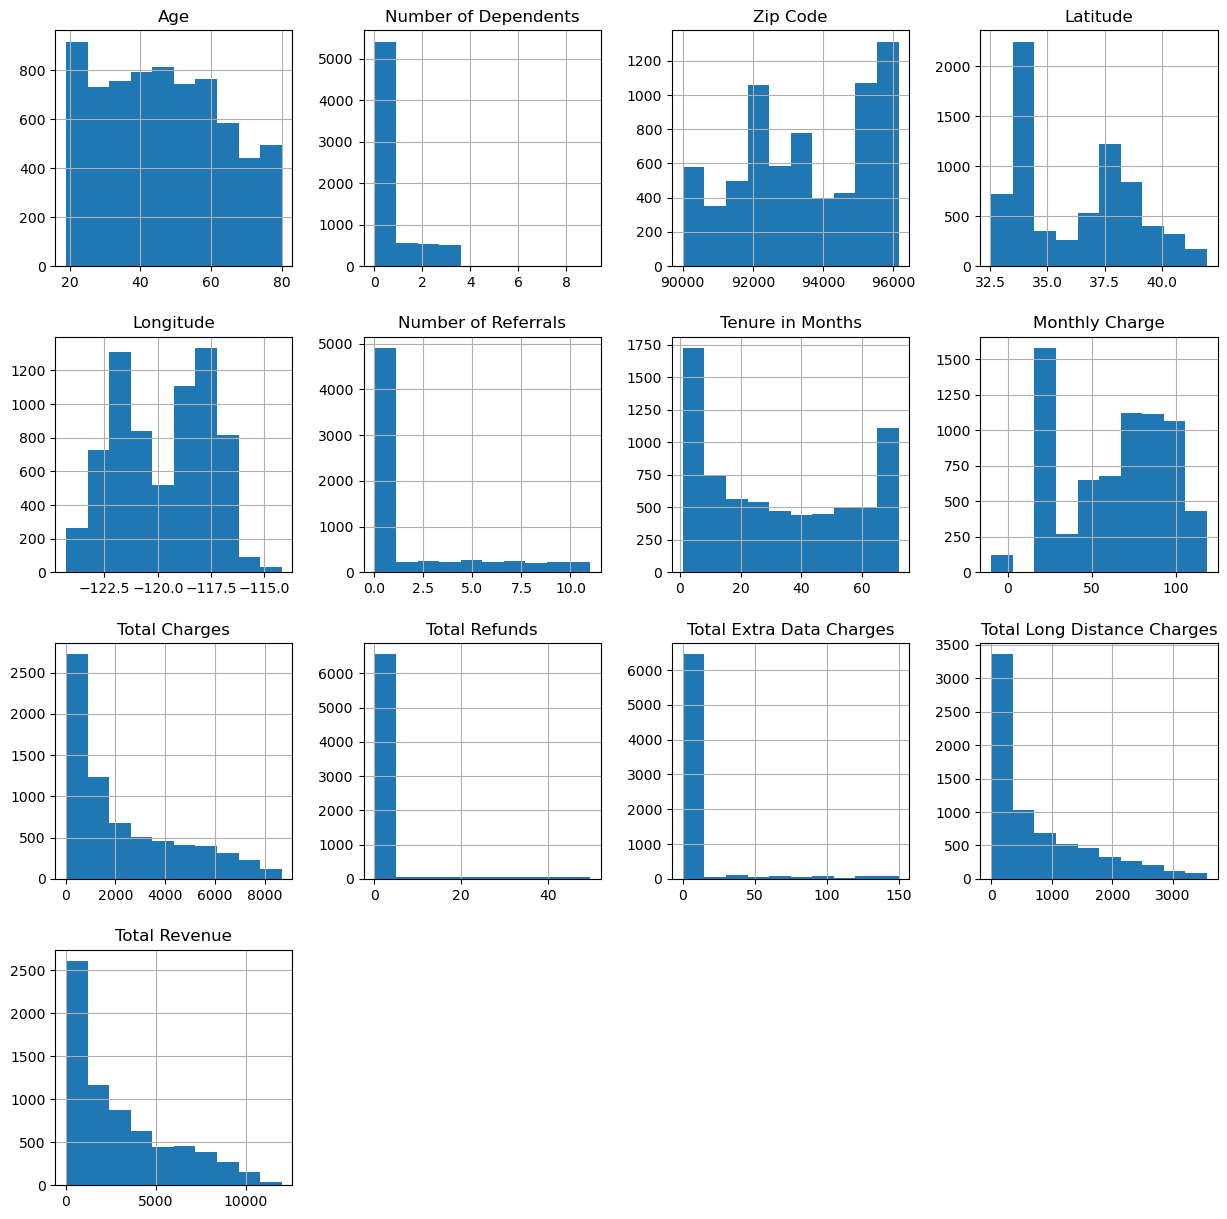

In [9]:
# visulize each variables 
df.hist(figsize=(15,15));

## Exploration with Visuals and Conclusions

#### Question 1: What is the churn rate?

Text(0.5, 0, 'Customer Status')

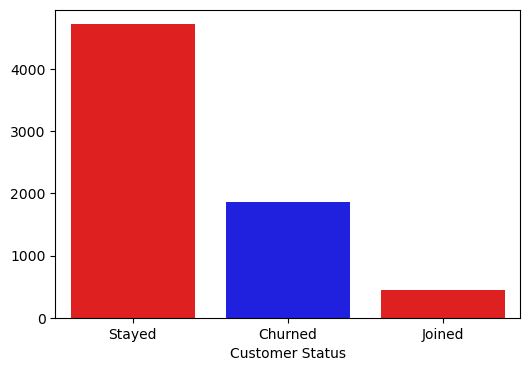

In [10]:
# Calculate the number of customers by churn status
churn_counts = df['Customer Status'].value_counts()

# create column chart
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['red', 'blue'])
plt.xlabel("Customer Status")


In [11]:
churn_counts.iloc[1] / df['Customer Status'].count()


0.2653698707936959

Conclusion for Q1:

The churn rate is 0.2653698707936959.

#### Question 2: Which customer groups have the highest churn rates based on contract?

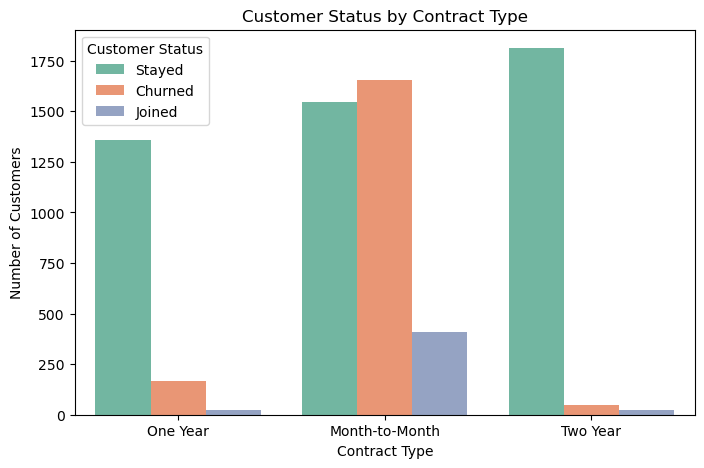

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Contract", hue="Customer Status", palette="Set2")

# Labels & Title
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.title("Customer Status by Contract Type")
plt.legend(title="Customer Status")

plt.show()

In [13]:
# customer with Contract Type là "Month-to-Month"
df_monthly = df[df["Contract"] == "Month-to-Month"]

# number churn cus month to month
churned_count = df_monthly[df_monthly["Customer Status"] == "Churned"].shape[0]

# sum of cus month to month
total_monthly = df_monthly.shape[0]

# rate churn month to month
churn_rate = churned_count / total_monthly

print(f"Churn rate for Month-to-Month contract customers: {churn_rate:.2%}")


Churn rate for Month-to-Month contract customers: 45.84%


Conclusion for question 2:

It can be seen that short-term contracts are more susceptible to cancellation due to the lack of long-term commitment.

### Question 3: What are the main reasons for churn? 

<Axes: xlabel='Churn Category'>

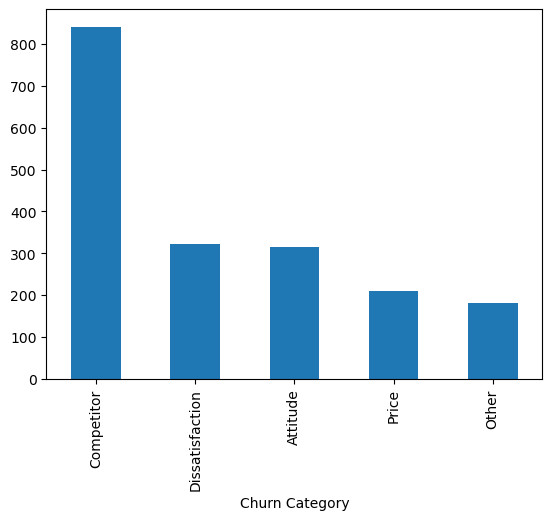

In [14]:
df_churned = df[df["Customer Status"] == "Churned"]
df_churned["Churn Category"].value_counts().plot(kind="bar")


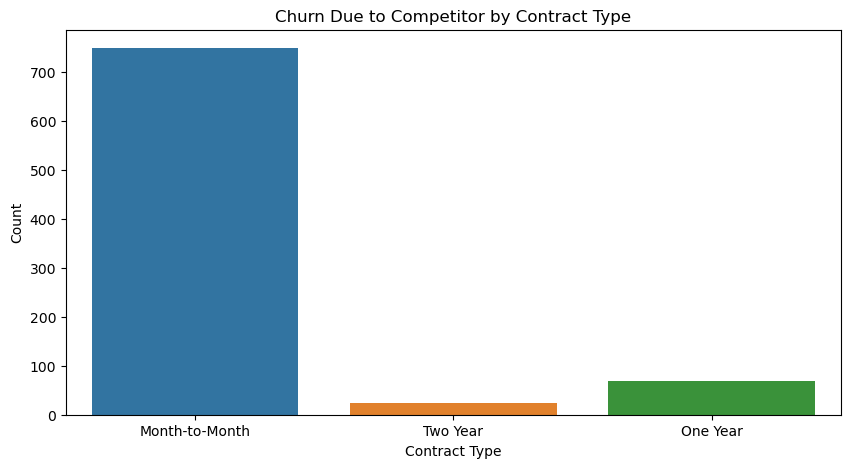

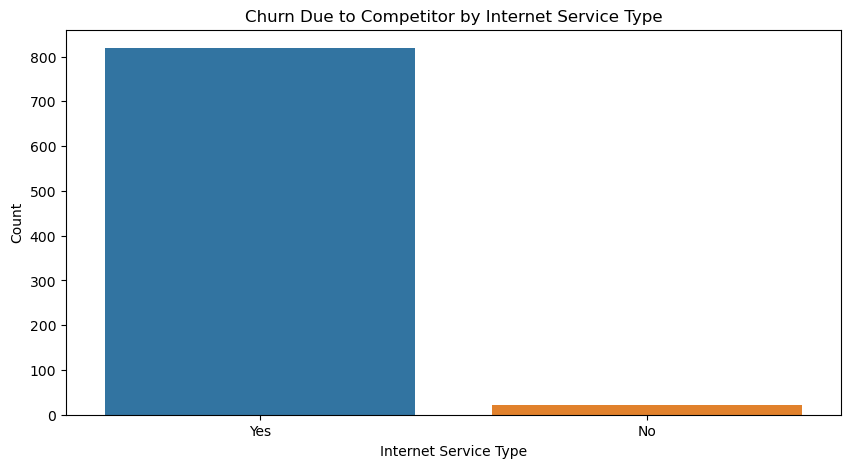

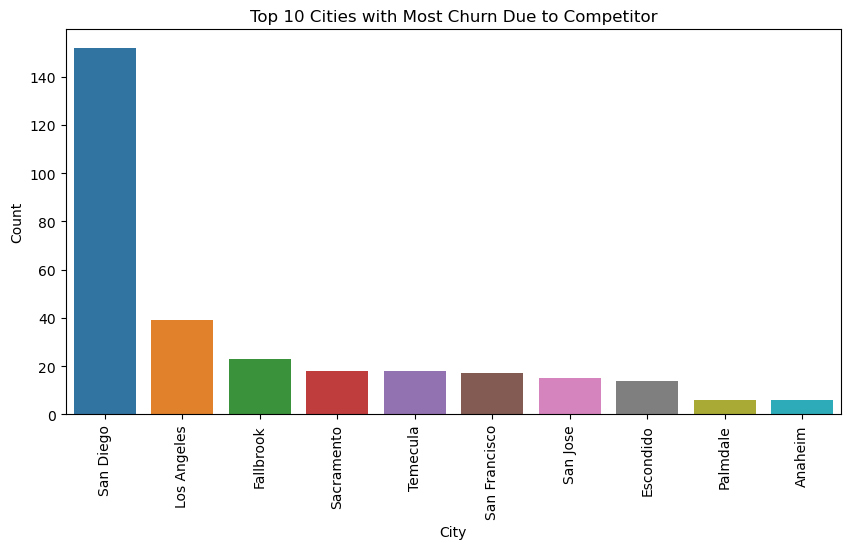

In [15]:

# Retain customers who have left and have churn reasons as "Competitors"
churn_competitor = df[df['Churn Category'] == 'Competitor']

# 1. Which customer group is most likely to leave due to competition?
plt.figure(figsize=(10,5))
sns.countplot(data=churn_competitor, x='Contract', order=df['Contract'].value_counts().index)
plt.title('Churn Due to Competitor by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

# 2. Which services are most affected by competitors?
plt.figure(figsize=(10,5))
sns.countplot(data=churn_competitor, x='Internet Service', order=df['Internet Service'].value_counts().index)
plt.title('Churn Due to Competitor by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()

# 3. Are there any geographic areas with higher churn rates?
plt.figure(figsize=(10,5))
sns.countplot(data=churn_competitor, x='City', order=churn_competitor['City'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Cities with Most Churn Due to Competitor')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()




Conclusion for question 3:

The main reason for churn is competitor, here are some details about the reason:

- Contract type have the highest churn rates due to competitors: Month-to-Month.
- Internet service has a significant impact on customer churn.
- Top the 10 cities with the highest churn rates (Top 1: San Diego).

### Question 4:  What are the most important factors in predicting churn

To identify the most important factors in predicting churn rate, I will perform a correlation analysis to find independent variables with high correlation, which will be selected for building the prediction model in the next question.

In [16]:
columns_to_drop2 = [
    'Zip Code', 'Latitude', 'Longitude', 'City','Churn Category'
]

df = df.drop(columns=columns_to_drop2)

Variables with too many different values ​​(City, Zip Code, Latitude, Longitude, Churn Category) should be removed because they are not meaningful when analyzing correlation.

In [17]:
df = pd.get_dummies(df)

In [18]:
df['Internet Service_No'] = df['Internet Service_No'].astype(int)
df['Internet Service_Yes'] = df['Internet Service_Yes'].astype(int)
df['Contract_Month-to-Month'] = df['Contract_Month-to-Month'].astype(int)
df['Contract_One Year'] = df['Contract_One Year'].astype(int)
df['Contract_Two Year'] = df['Contract_Two Year'].astype(int)
df['Paperless Billing_No'] = df['Paperless Billing_No'].astype(int)
df['Paperless Billing_Yes'] = df['Paperless Billing_Yes'].astype(int)
df['Payment Method_Bank Withdrawal'] = df['Payment Method_Bank Withdrawal'].astype(int)
df['Payment Method_Credit Card'] = df['Payment Method_Credit Card'].astype(int)
df['Payment Method_Mailed Check'] = df['Payment Method_Mailed Check'].astype(int)
df['Customer Status_Churned'] = df['Customer Status_Churned'].astype(int)
cols_to_convert = [
    'Total Revenue', 'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes', 
    'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 
    'Phone Service_No', 'Phone Service_Yes'
]

df[cols_to_convert] = df[cols_to_convert].astype(int)
          

For variables with few values I create dummy variables

In [19]:
# delete other status 
del df['Customer Status_Stayed']
del df['Customer Status_Joined']


In [20]:
# correlation matrix
corr_matrix = df.corr()

In [21]:
# correlation with churn
churn_corr = corr_matrix['Customer Status_Churned'].sort_values(ascending=False)

In [22]:
churn_corr

Customer Status_Churned           1.000000
Contract_Month-to-Month           0.448427
Internet Service_Yes              0.227890
Offer_Offer E                     0.214648
Paperless Billing_Yes             0.191825
Payment Method_Bank Withdrawal    0.188733
Monthly Charge                    0.187833
Married_No                        0.150448
Age                               0.115760
Payment Method_Mailed Check       0.056348
Phone Service_Yes                 0.011942
Gender_Female                     0.008612
Total Extra Data Charges          0.007139
Offer_Offer D                     0.001435
Gender_Male                      -0.008612
Phone Service_No                 -0.011942
Offer_Offer C                    -0.020660
Total Refunds                    -0.033709
Offer_Offer B                    -0.117723
Offer_Offer A                    -0.126654
Married_Yes                      -0.150448
Contract_One Year                -0.190418
Paperless Billing_No             -0.191825
Total Charg

Conclusion for question 4:

From the above correlation analysis, it can be seen that the independent variable that has the most influence on churn is 'Contract_Month-to-Month', followed by variables such as 'Number of Referrals', 'Contract_Two Year', 'Tenure in Months',...

### Question 5: Predicting whether a customer will churn or not?

Here I use Multi Linear Regression method to predict whether a customer is likely to churn or not through independent variables.

In [23]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sn

In [24]:
X_multi = df.drop("Customer Status_Churned",axis=1)

In [25]:
X_multi.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,...,Internet Service_No,Internet Service_Yes,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,37,0,2,9,65.6,593.30,0.00,0,381.51,974,...,0,1,0,1,0,0,1,0,1,0
1,46,0,0,9,-4.0,542.40,38.33,10,96.21,610,...,0,1,1,0,0,1,0,0,1,0
2,50,0,0,4,73.9,280.85,0.00,0,134.60,415,...,0,1,1,0,0,0,1,1,0,0
3,78,0,1,13,98.0,1237.85,0.00,0,361.66,1599,...,0,1,1,0,0,0,1,1,0,0
4,75,0,3,3,83.9,267.40,0.00,0,22.14,289,...,0,1,1,0,0,0,1,0,1,0


In [26]:
y_multi = df['Customer Status_Churned']

In [27]:
y_multi.head()

0    0
1    0
2    1
3    1
4    1
Name: Customer Status_Churned, dtype: int64

In [28]:
X_multi_cons = sn.add_constant(X_multi)

In [29]:
X_multi_cons.head()

,const,Age,Number of Dependents,Number of Referrals,Tenure in Months,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,...,Internet Service_No,Internet Service_Yes,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,1.0,37,0,2,9,65.6,593.30,0.00,0,381.51,...,0,1,0,1,0,0,1,0,1,0
1,1.0,46,0,0,9,-4.0,542.40,38.33,10,96.21,...,0,1,1,0,0,1,0,0,1,0
2,1.0,50,0,0,4,73.9,280.85,0.00,0,134.60,...,0,1,1,0,0,0,1,1,0,0
3,1.0,78,0,1,13,98.0,1237.85,0.00,0,361.66,...,0,1,1,0,0,0,1,1,0,0
4,1.0,75,0,3,3,83.9,267.40,0.00,0,22.14,...,0,1,1,0,0,0,1,0,1,0


In [30]:
lm_multi = sn.OLS(y_multi, X_multi_cons).fit()

In [31]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Status_Churned   R-squared:                       0.339
Model:                                 OLS   Adj. R-squared:                  0.336
Method:                      Least Squares   F-statistic:                     149.8
Date:                     Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                             19:44:00   Log-Likelihood:                -2779.5
No. Observations:                     7043   AIC:                             5609.
Df Residuals:                         7018   BIC:                             5781.
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0293      0.006      5.141      0.000       0.018       0.041
Age                                0.0019      0.000      7.105      0.000       0.001       0.002
Number of Dependents              -0.0502      0.005    -10.377      0.000      -0.060      -0.041
Number of Referrals               -0.0332      0.002    -16.922      0.000      -0.037      -0.029
Tenure in Months                  -0.0005      0.000     -0.967      0.334      -0.001       0.000
Monthly Charge                     0.0040      0.000     13.270      0.000       0.003       0.005
Total Charges                      0.0156      0.015      1.048      0.295      -0.014       0.045
Total Refunds                     -0.0166      0.015     -1.109      0.267      -0.046       0.013
Total Extra Data Charges           0.0157      0.015      1.053      0.292      -0.014       0.045
Total Long Distance Charges        0.0157      0.015      1.052      0.293      -0.014       0.045
Total Revenue                     -0.0157      0.015     -1.052      0.293      -0.045       0.014
Gender_Female                      0.0157      0.005      3.029      0.002       0.006       0.026
Gender_Male                        0.0137      0.005      2.662      0.008       0.004       0.024
Married_No                        -0.0630      0.006    -10.291      0.000      -0.075      -0.051
Married_Yes                        0.0924      0.007     12.648      0.000       0.078       0.107
Offer_Offer A                      0.0532      0.019      2.756      0.006       0.015       0.091
Offer_Offer B                     -0.0250      0.015     -1.686      0.092      -0.054       0.004
Offer_Offer C                     -0.0581      0.019     -3.108      0.002      -0.095      -0.021
Offer_Offer D                     -0.0872      0.016     -5.375      0.000      -0.119      -0.055
Offer_Offer E                      0.0796      0.015      5.144      0.000       0.049       0.110
Phone Service_No                   0.0415      0.010      4.119      0.000       0.022       0.061
Phone Service_Yes                 -0.0121      0.009     -1.281      0.200      -0.031       0.006
Internet Service_No                0.0221      0.009      2.329      0.020       0.003       0.041
Internet Service_Yes               0.0072      0.010      0.721      0.471      -0.012       0.027
Contract_Month-to-Month            0.1703      0.008     22.625      0.000       0.156       0.185
Contract_One Year                 -0.0562      0.007     -7.502      0.000      -0.071      -0.042
Contract_Two Year                 -0.0848      0.009     -9.618      0.000      -0.102      -0.067
Paperless Billing_No              -0.0129      0.005     -

Conclusion for question 5:

- R-squared = 0.339 (33.9%):
  + The model explains 33.9% of the variation in churned customers.
  + This is an average level, not too high, showing that there are many other factors affecting churn that the model has not captured.
- Adj. R-squared = 0.336: Adjusted for the number of independent variables, it is still quite similar to R-squared so there are not too many redundant variables.
- F-statistic = 149.8, Prob (F-statistic) = 0.00: The model is statistically significant because the p-value is close to 0.00.

## Conclusion

Based on all the above analysis, I can summarize the following points: 
- The customer churn rate is highly related to the type of contract they sign. 'Month to Month' contracts have a churn rate of nearly 50%.
- The main reason for churn is competitor.
- Based on business sense, consider removing some variables that may affect the model training process.

## Limitations:
- The dataset is not large enough to analyze a predictive model accurately enough.

## Reference:

1. https://www.investopedia.com/terms/c/correlationcoefficient.asp#:~:text=In%20physics%20and%20chemistry%2C%20a,and%20as%20low%20as%200.5.
2. https://www.geeksforgeeks.org/six-steps-of-data-analysis-process/?fbclid=IwY2xjawIXCLZleHRuA2FlbQIxMAABHS6dzVoNjLzI-8e3fszxhHD4J6ltqi7VlgFRWBa1YqE2kmOPtpcbiREPmw_aem_aV2HuhByUZxtJWn9eXEi3A